In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis_v2'

In [2]:
BaseDir = "./results/"


In [3]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)
df_toplot = selected_df

In [4]:
df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()

/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_90982/2324493696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001


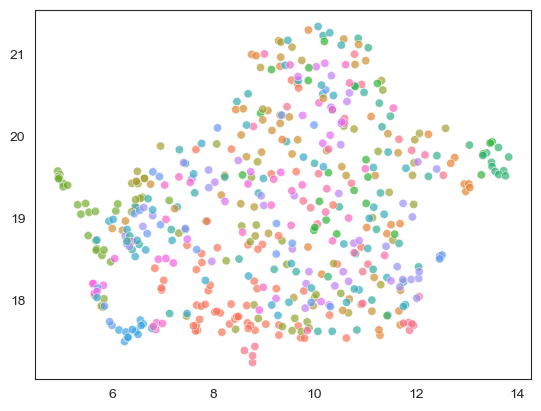

In [5]:
## UMAP

subsetDf = df_toplot[df_toplot['Metadata_cmpd_conc'] != 0.00833]
subsetDf = subsetDf[subsetDf['Metadata_cmpd_conc'] != 0.03330] # Remove lowest concentrations
subsetDf = subsetDf[subsetDf['Metadata_cmpd_conc'] != 0.1]
training_data_subset = subsetDf.drop(ListOfMetadata, axis=1).to_numpy()


reducer = umap.UMAP(n_components=2, n_neighbors=24, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data_subset)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=subsetDf.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )

#### Trace back to which well

In [7]:
ListOfMetadata2 = ['Metadata_cmpd','Metadata_plate_well','Metadata_cmpd_conc', 'Metadata_moa', 'Metadata_class']


In [8]:
hover_data = subsetDf[ListOfMetadata2]
umap.plot.output_notebook()
p = umap.plot.interactive(reducer, labels=subsetDf['Metadata_cmpd'], hover_data=hover_data, point_size=4, alpha = 1)
umap.plot.show(p)

Loading BokehJS ...